In [6]:
#1. Choose a classification dataset and normalize features
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
df = pd.read_csv("Iris.csv")

# Drop ID column (not useful)
df.drop("Id", axis=1, inplace=True)

# Split features and target
X = df.drop("Species", axis=1)
y = df["Species"]

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [7]:
#2. Use KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Create KNN model with a sample K (e.g., K=3)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

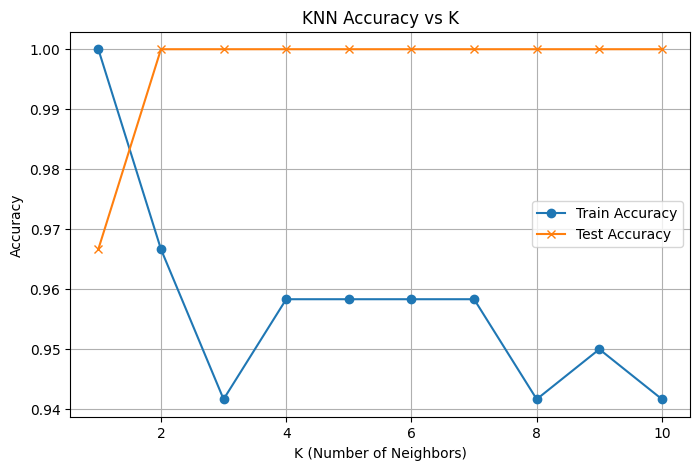

In [8]:
#3. Experiment with different values of K
import matplotlib.pyplot as plt

train_acc = []
test_acc = []

# Try K from 1 to 10
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

# Plot K vs accuracy
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), train_acc, marker='o', label='Train Accuracy')
plt.plot(range(1, 11), test_acc, marker='x', label='Test Accuracy')
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.legend()
plt.grid(True)
plt.show()


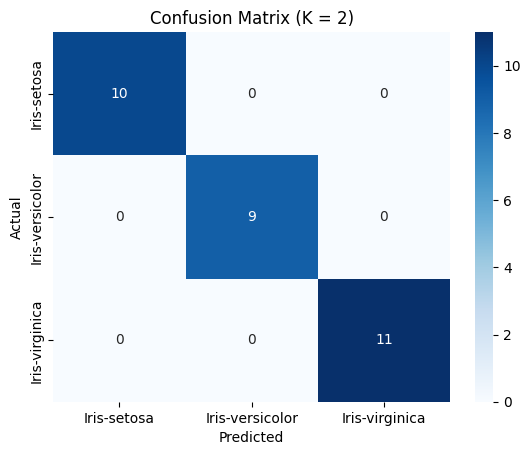

Test Accuracy (K=2): 1.0


In [9]:
#4. Evaluate model using accuracy and confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Choose best K based on test accuracy
best_k = test_acc.index(max(test_acc)) + 1

# Train with best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict
y_pred = best_knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (K = {best_k})")
plt.show()

# Accuracy
print(f"Test Accuracy (K={best_k}):", accuracy_score(y_test, y_pred))
